In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# The %matplotlib inline magic command is used in Jupyter Notebooks to specify that the output of Matplotlib
#  plots should be displayed directly within the notebook, rather than in a separate window or external viewer.

In [186]:
Traindata = pd.read_csv('trainRegression.csv') 
Testdata = pd.read_csv('testRegression.csv')

In [187]:
print(Traindata.head())
print(Testdata.head())

      X       R
0  0.01 -0.2730
1  0.02 -0.1170
2  0.03 -0.3090
3  0.04  0.0306
4  0.05 -0.0802
     X      R
0  0.0 -0.226
1  0.1 -0.174
2  0.2  0.459
3  0.3  0.638
4  0.4  0.869


In [188]:
Traindata.shape

(283, 2)

In [189]:
Testdata.shape

(32, 2)

In [190]:
input = Traindata['X']
output = Traindata['R']
input, output

(0      0.01
 1      0.02
 2      0.03
 3      0.04
 4      0.05
        ... 
 278    3.09
 279    3.11
 280    3.12
 281    3.13
 282    3.14
 Name: X, Length: 283, dtype: float64,
 0     -0.27300
 1     -0.11700
 2     -0.30900
 3      0.03060
 4     -0.08020
         ...   
 278    0.35600
 279    0.00649
 280    0.27600
 281    0.21000
 282    0.32200
 Name: R, Length: 283, dtype: float64)

In [191]:
input_array = np.array(input)
output_array = np.array(output)
input_array, output_array

(array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.11, 0.12,
        0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.21, 0.22, 0.23, 0.24,
        0.25, 0.26, 0.27, 0.28, 0.29, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36,
        0.37, 0.38, 0.39, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48,
        0.49, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.61,
        0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.71, 0.72, 0.73,
        0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.81, 0.82, 0.83, 0.84, 0.85,
        0.86, 0.87, 0.88, 0.89, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
        0.98, 0.99, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
        1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.21, 1.22,
        1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.31, 1.32, 1.33, 1.34,
        1.35, 1.36, 1.37, 1.38, 1.39, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46,
        1.47, 1.48, 1.49, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58,
        1.59, 1.61, 1.62, 1.63, 1.64, 

In [192]:
Length_Train = len(Traindata['X'])
Length_Test = len(Testdata['X'])
print(Length_Train, Length_Test)

283 32


In [193]:
Total_input = sum(np.array(input_array))
print(Total_input)

444.95


In [194]:
Square_input = sum((input_array**2))
print(Square_input)

932.7465000000004


In [195]:
A_Matrix = [[Length_Train+1, Total_input],[Total_input,Square_input]]
print(A_Matrix)

[[284, 444.95], [444.95, 932.7465000000004]]


In [196]:
A_Inverse = np.linalg.inv(A_Matrix)
print(A_Inverse)

[[ 0.01393834 -0.00664903]
 [-0.00664903  0.0042439 ]]


In [197]:
Total_output=sum(np.array(output))
Product_Output=np.sum(np.dot(output_array,input_array))
Total_output, Product_Output

(1.3908700000000231, -126.64142949999993)

In [198]:
Y_Matrix = [[Total_output],[Product_Output]]
Y_Matrix

[[1.3908700000000231], [-126.64142949999993]]

In [199]:
Unknown = np.dot(A_Inverse,Y_Matrix)
Unknown

array([[ 0.86142948],
       [-0.54670211]])

In [200]:
Prediction = Unknown[0] + Unknown[1] * Traindata['X']

In [201]:
MSE_training=(1/Length_Train)* np.sum((Prediction-Traindata["R"])**2)
print(MSE_training)

0.2991098184765243


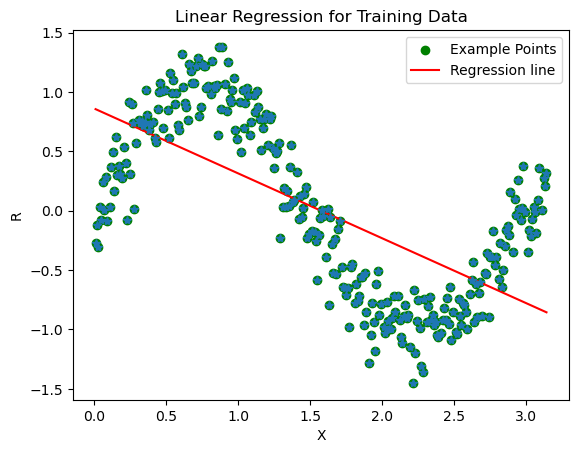

In [202]:
plt.scatter(Traindata['X'], Traindata['R'],color = 'green' ,label='Example Points')
plt.plot(Traindata["X"], Prediction, color='red', label='Regression line')
plt.plot(Traindata['X'],Traindata['R'],'*')

plt.xlabel('X')
plt.ylabel('R')
plt.legend()
plt.title('Linear Regression for Training Data')
plt.show()


In [203]:
Prediction_Test = Unknown[0] + (Unknown[1] * Testdata['X'] )
print(Prediction_Test)


0     0.861429
1     0.806759
2     0.752089
3     0.697419
4     0.642749
5     0.588078
6     0.533408
7     0.478738
8     0.424068
9     0.369398
10    0.314727
11    0.260057
12    0.205387
13    0.150717
14    0.096047
15    0.041376
16   -0.013294
17   -0.067964
18   -0.122634
19   -0.177305
20   -0.231975
21   -0.286645
22   -0.341315
23   -0.395985
24   -0.450656
25   -0.505326
26   -0.559996
27   -0.614666
28   -0.669336
29   -0.724007
30   -0.778677
31   -0.833347
Name: X, dtype: float64


In [204]:

MSE_Testing=(1/Length_Test)* np.sum((Prediction_Test -  Testdata["R"])**2)
print(MSE_Testing)

0.3153746658385873


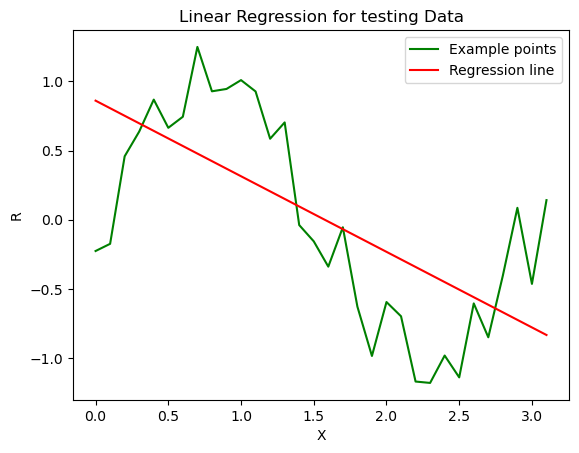

In [207]:
plt.plot(Testdata['X'], Testdata['R'],color = 'green', label='Example points')

# Plot the regression line
plt.plot(Testdata["X"], Prediction_Test, color='red', label='Regression line')

plt.xlabel('X')
plt.ylabel('R')
plt.legend()
plt.title('Linear Regression for testing Data')
plt.show()

In [206]:
print("MSE for Training data for Linear Regression is:    ", MSE_training)
print("MSE for Testing data for Linear Regression is:      ", MSE_Testing)

MSE for Training data for Linear Regression is:     0.2991098184765243
MSE for Testing data for Linear Regression is:       0.3153746658385873


By observing mean square error(MSE) on training data and testing data, we concluded that model performs better on training data as MSE of training data is lesser than Testing data.